In [92]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# 결과값이 여러 가지 일 때
# 1 부터 K 까지 정수 중 하나가 나오는 확률 변수의 분포
 
# 카테고리 분포에서는 벡터 확률 변수로 사용함 (다차원 벡터)    
    
# ex) 주사위 : x = {1,2,3,4,5,6} ; K = 6 인 카테고리 분포
# 이 때, if x = 1, x = (1,0,0,0,0,0)
#           x = 2, x = (0,1,0,0,0,0)
#                ...
# 이런 인코딩 방식을 One-Hot-Encoding 방법 이라고 함

# 각 x 가 등장(1), 안 등장(0) ; 베르누이 시행처럼 확률을 가짐 (theta(x))
# sum of all theta = 1

In [ ]:
# 별도의 카테고리 분포 클래스 제공 x
# 다항분포를 위한 multinomial 에서 시행횟수를 1로 설정한 것 => 카테고리 분포

In [16]:
p = np.array([1/6]*6)
p

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [56]:
rv = sp.stats.multinomial(1, p)
xx = np.arange(1,7)
xx

array([1, 2, 3, 4, 5, 6])

In [57]:
# get_dummies => One-Hot-Encoding 사용할 때 이용

xx_ohe = pd.get_dummies(xx)
xx_ohe

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


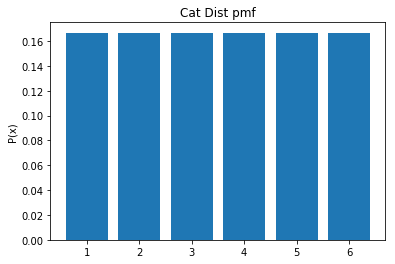

In [58]:
plt.bar(xx,xx_ohe.sum(axis=0)/len(xx))
plt.ylabel("P(x)")
plt.title("Cat Dist pmf")
plt.show()

In [52]:
# simulate

np.random.seed(1)

X = rv.rvs(1000)    # 표본 수 : 1000
X[:6]    # 첫 여섯 줄만 출력

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

[0.159 0.178 0.168 0.172 0.151 0.172]


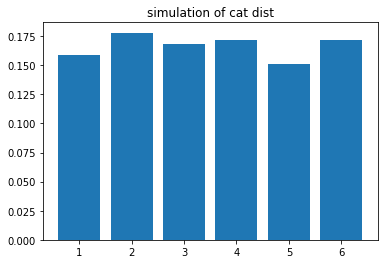

In [53]:
y = X.sum(axis=0)/float(len(X))   # 열 마다(카테고리 마다) 합을 총 행 수로 나눠줌
print(y)

plt.bar(np.arange(1,7),y)

plt.title("simulation of cat dist")
plt.show()

In [61]:
df = pd.DataFrame({'theory':xx_ohe.sum(axis=0)/len(xx), 'simulation':y}, index=np.arange(1,7)).stack()
print(df)

1  theory        0.166667
   simulation    0.159000
2  theory        0.166667
   simulation    0.178000
3  theory        0.166667
   simulation    0.168000
4  theory        0.166667
   simulation    0.172000
5  theory        0.166667
   simulation    0.151000
6  theory        0.166667
   simulation    0.172000
dtype: float64


In [85]:
df = df.reset_index()
df.columns = ['value', 'type', '%']
df.pivot('value', 'type','%')
print(df)

    value        type         %
0       1      theory  0.166667
1       1  simulation  0.000000
2       2      theory  0.166667
3       2  simulation  0.000000
4       3      theory  0.166667
5       3  simulation  0.240000
6       4      theory  0.166667
7       4  simulation  0.100000
8       5      theory  0.166667
9       5  simulation  0.240000
10      6      theory  0.166667
11      6  simulation  0.420000


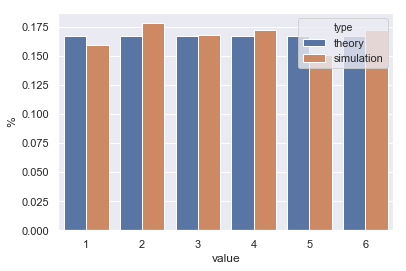

In [66]:
sns.barplot(x='value',y='%',hue='type',data=df)
sns.set()
sns.set_style('darkgrid')
plt.show()

In [67]:
# 확률을 다르게 부여

eps = np.finfo(np.float).eps # 0 에 가까운 아주 작은 수
print(eps)
p = np.array([eps,eps,0.2,0.1,0.3,0.4])

2.220446049250313e-16


    value        type         %
0       1      theory  0.166667
1       1  simulation  0.000000
2       2      theory  0.166667
3       2  simulation  0.000000
4       3      theory  0.166667
5       3  simulation  0.240000
6       4      theory  0.166667
7       4  simulation  0.100000
8       5      theory  0.166667
9       5  simulation  0.240000
10      6      theory  0.166667
11      6  simulation  0.420000


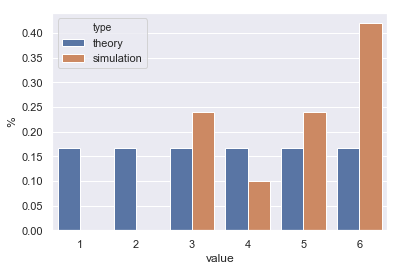

In [117]:
rv = sp.stats.multinomial(1,p)
X = rv.rvs(100,random_state=1)
y = X.sum(axis=0)/float(len(X)) # 행들을 더해서 행 수로 나눔

df = pd.DataFrame({'theory':xx_ohe.sum(axis=0)/len(xx),'simulation':y},index=np.arange(1,7)).stack()
df = df.reset_index()
df.columns = ['value', 'type', '%']
df.pivot('value', 'type','%')
print(df)

sns.barplot(x='value',y='%',hue='type',data=df)
plt.show()
#plt.show()